In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Descriptions

Compute model performance metrics.

# Imports

In [2]:
import datetime
import logging

import matplotlib.pyplot as plt
import pandas as pd

import core.config as cconfig
import core.plotting as coplotti
import dataflow.core as dtfcore
import dataflow.model as dtfmod
import helpers.hdbg as hdbg
import helpers.henv as henv
import helpers.hpandas as hpandas
import helpers.hprint as hprint

/app/amp/core/explore.py:39: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook as tauton


In [3]:
hdbg.init_logger(verbosity=logging.INFO)

_LOG = logging.getLogger(__name__)

_LOG.info("%s", henv.get_system_signature()[0])

hprint.config_notebook()

INFO: > cmd='/venv/lib/python3.8/site-packages/ipykernel_launcher.py -f /home/.local/share/jupyter/runtime/kernel-d30eb480-315f-4c40-a363-1443d1826a26.json'
INFO  # Git
  branch_name='CmTask5051_Port_Cx_ProdSystem_to_the_new_style'
  hash='31bf2944a'
  # Last commits:
    * 31bf2944a Nina Lee checkpoint                                                        (   4 hours ago) Thu Aug 24 16:59:26 2023  (HEAD -> CmTask5051_Port_Cx_ProdSystem_to_the_new_style, origin/CmTask5051_Port_Cx_ProdSystem_to_the_new_style)
    * caac00b99 Nina Lee checkpoint                                                        (   4 hours ago) Thu Aug 24 16:42:38 2023           
    *   65f9a7ba3 Nina Lee Merge branch 'master' into CmTask5051_Port_Cx_ProdSystem_to_the_new_style (   5 hours ago) Thu Aug 24 16:23:23 2023           
    |\  
# Machine info
  system=Linux
  node name=c24ced58c9eb
  release=5.15.0-1039-aws
  version=#44~20.04.1-Ubuntu SMP Thu Jun 22 12:21:12 UTC 2023
  machine=x86_64
  processor=x86_64

# Config

In [4]:
config = {
    "dir_name": "/shared_data/model/historical/build_tile_configs.C1b.ccxt_v7_1-all.5T.2019-10-01_2023-02-13.ins/tiled_results/",
    "asset_id_col": "asset_id",
    "dag_builder_name": "C1b",
    "dag_builder_ctor_as_str": "dataflow_orange.pipelines.C1.C1b_pipeline.C1b_DagBuilder",
    "start_date": datetime.date(2019, 10, 1),
    "end_date": datetime.date(2023, 2, 13),
    "plot_portfolio_stats_freq": "D",
    "fep_annotate_forecasts_kwargs": {
        "quantization": 30,
        "burn_in_bars": 3,
        "style": "longitudinal",
        "liquidate_at_end_of_day": False,
        "initialize_beginning_of_day_trades_to_zero": False,
    },
    "fep_binning_portfolio": {
        "proportion_of_data_per_bin": 0.1,
    },
}
# Add `DagBuilder` column names to the config.
dag_builder = dtfcore.get_DagBuilder_from_string(
    config["dag_builder_ctor_as_str"]
)
column_tags = ["price", "volatility", "prediction"]
config["column_names"] = dag_builder.get_column_names_dict(column_tags)
config = cconfig.Config().from_dict(config)
print(config)

dir_name: /shared_data/model/historical/build_tile_configs.C1b.ccxt_v7_1-all.5T.2019-10-01_2023-02-13.ins/tiled_results/
asset_id_col: asset_id
dag_builder_name: C1b
dag_builder_ctor_as_str: dataflow_orange.pipelines.C1.C1b_pipeline.C1b_DagBuilder
start_date: 2019-10-01
end_date: 2023-02-13
plot_portfolio_stats_freq: D
fep_annotate_forecasts_kwargs: 
  quantization: 30
  burn_in_bars: 3
  style: longitudinal
  liquidate_at_end_of_day: False
  initialize_beginning_of_day_trades_to_zero: False
fep_binning_portfolio: 
  proportion_of_data_per_bin: 0.1
column_names: 
  price: vwap
  volatility: vwap.ret_0.vol
  prediction: vwap.ret_0.vol_adj.shift_-2_hat


# Load results

In [5]:
data_cols = list(config["column_names"].to_dict().values())
iter_ = dtfmod.yield_processed_parquet_tiles_by_year(
    config["dir_name"],
    config["start_date"],
    config["end_date"],
    config["asset_id_col"],
    data_cols,
    asset_ids=None,
)
df_res = hpandas.get_df_from_iterator(iter_)
df_res.head()

  0%|          | 0/5 [00:00<?, ?it/s]

vwap              vwap.ret_0.vol            vwap.ret_0.vol_adj.shift_-2_hat                  vwap                                                                                                                                                                                                                                                   vwap.ret_0.vol                                                                                                                                                                                                                                                   vwap.ret_0.vol_adj.shift_-2_hat                                                                                                                                                                                                                                                  
asset_id                  1464553467   1467591036     1464553467 1467591036                      1464553467 1467591036 1030828978 1528092593 1776791608 1891737434 1966583502 2099673105 2237530510 2384892553 2425308589 2476706208 2484635488 2540896331 2601760471 2683705052 3065029174 3401245610 4516629366 5115052901 5118394986 6051632686 8717633868 8968126878 9872743573     1030828978 1528092593 1776791608 1891737434 1966583502 2099673105 2237530510 2384892553 2425308589 2476706208 2484635488 2540896331 2601760471 2683705052 3065029174 3401245610 4516629366 5115052901 5118394986 6051632686 8717633868 8968126878 9872743573                      1030828978 1528092593 1776791608 1891737434 1966583502 2099673105 2237530510 2384892553 2425308589 2476706208 2484635488 2540896331 2601760471 2683705052 3065029174 3401245610 4516629366 5115052901 5118394986 6051632686 8717633868 8968126878 9872743573
end_ts                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
2019-10-01 00:00:00+00:00        NaN  8282.824049            NaN   0.001509                             NaN  -0.022196        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN            NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN                             NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN
2019-10-01 00:05:00+00:00        NaN  8245.537329            NaN   0.003570                             NaN   0.035918        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN            NaN        NaN        NaN        NaN 

# Compute research PnL

In [6]:
fep = dtfmod.ForecastEvaluatorFromPrices(
    config["column_names"]["price"],
    config["column_names"]["volatility"],
    config["column_names"]["prediction"],
)

In [7]:
portfolio_df, bar_metrics = fep.annotate_forecasts(
    df_res,
    # bulk_frac_to_remove=config["fep_annotate_forecasts_kwargs"]["bulk_frac_to_remove"],
    # bulk_fill_method=config["fep_annotate_forecasts_kwargs"]["bulk_fill_method"],
    # target_gmv=config["fep_annotate_forecasts_kwargs"]["target_gmv"],
    quantization=config["fep_annotate_forecasts_kwargs"]["quantization"],
    burn_in_bars=config["fep_annotate_forecasts_kwargs"]["burn_in_bars"],
    style=config["fep_annotate_forecasts_kwargs"]["style"],
    liquidate_at_end_of_day=config["fep_annotate_forecasts_kwargs"][
        "liquidate_at_end_of_day"
    ],
    initialize_beginning_of_day_trades_to_zero=config[
        "fep_annotate_forecasts_kwargs"
    ]["initialize_beginning_of_day_trades_to_zero"],
)

INFO  spread is `None`; imputing spread_lower_bound=0.000100


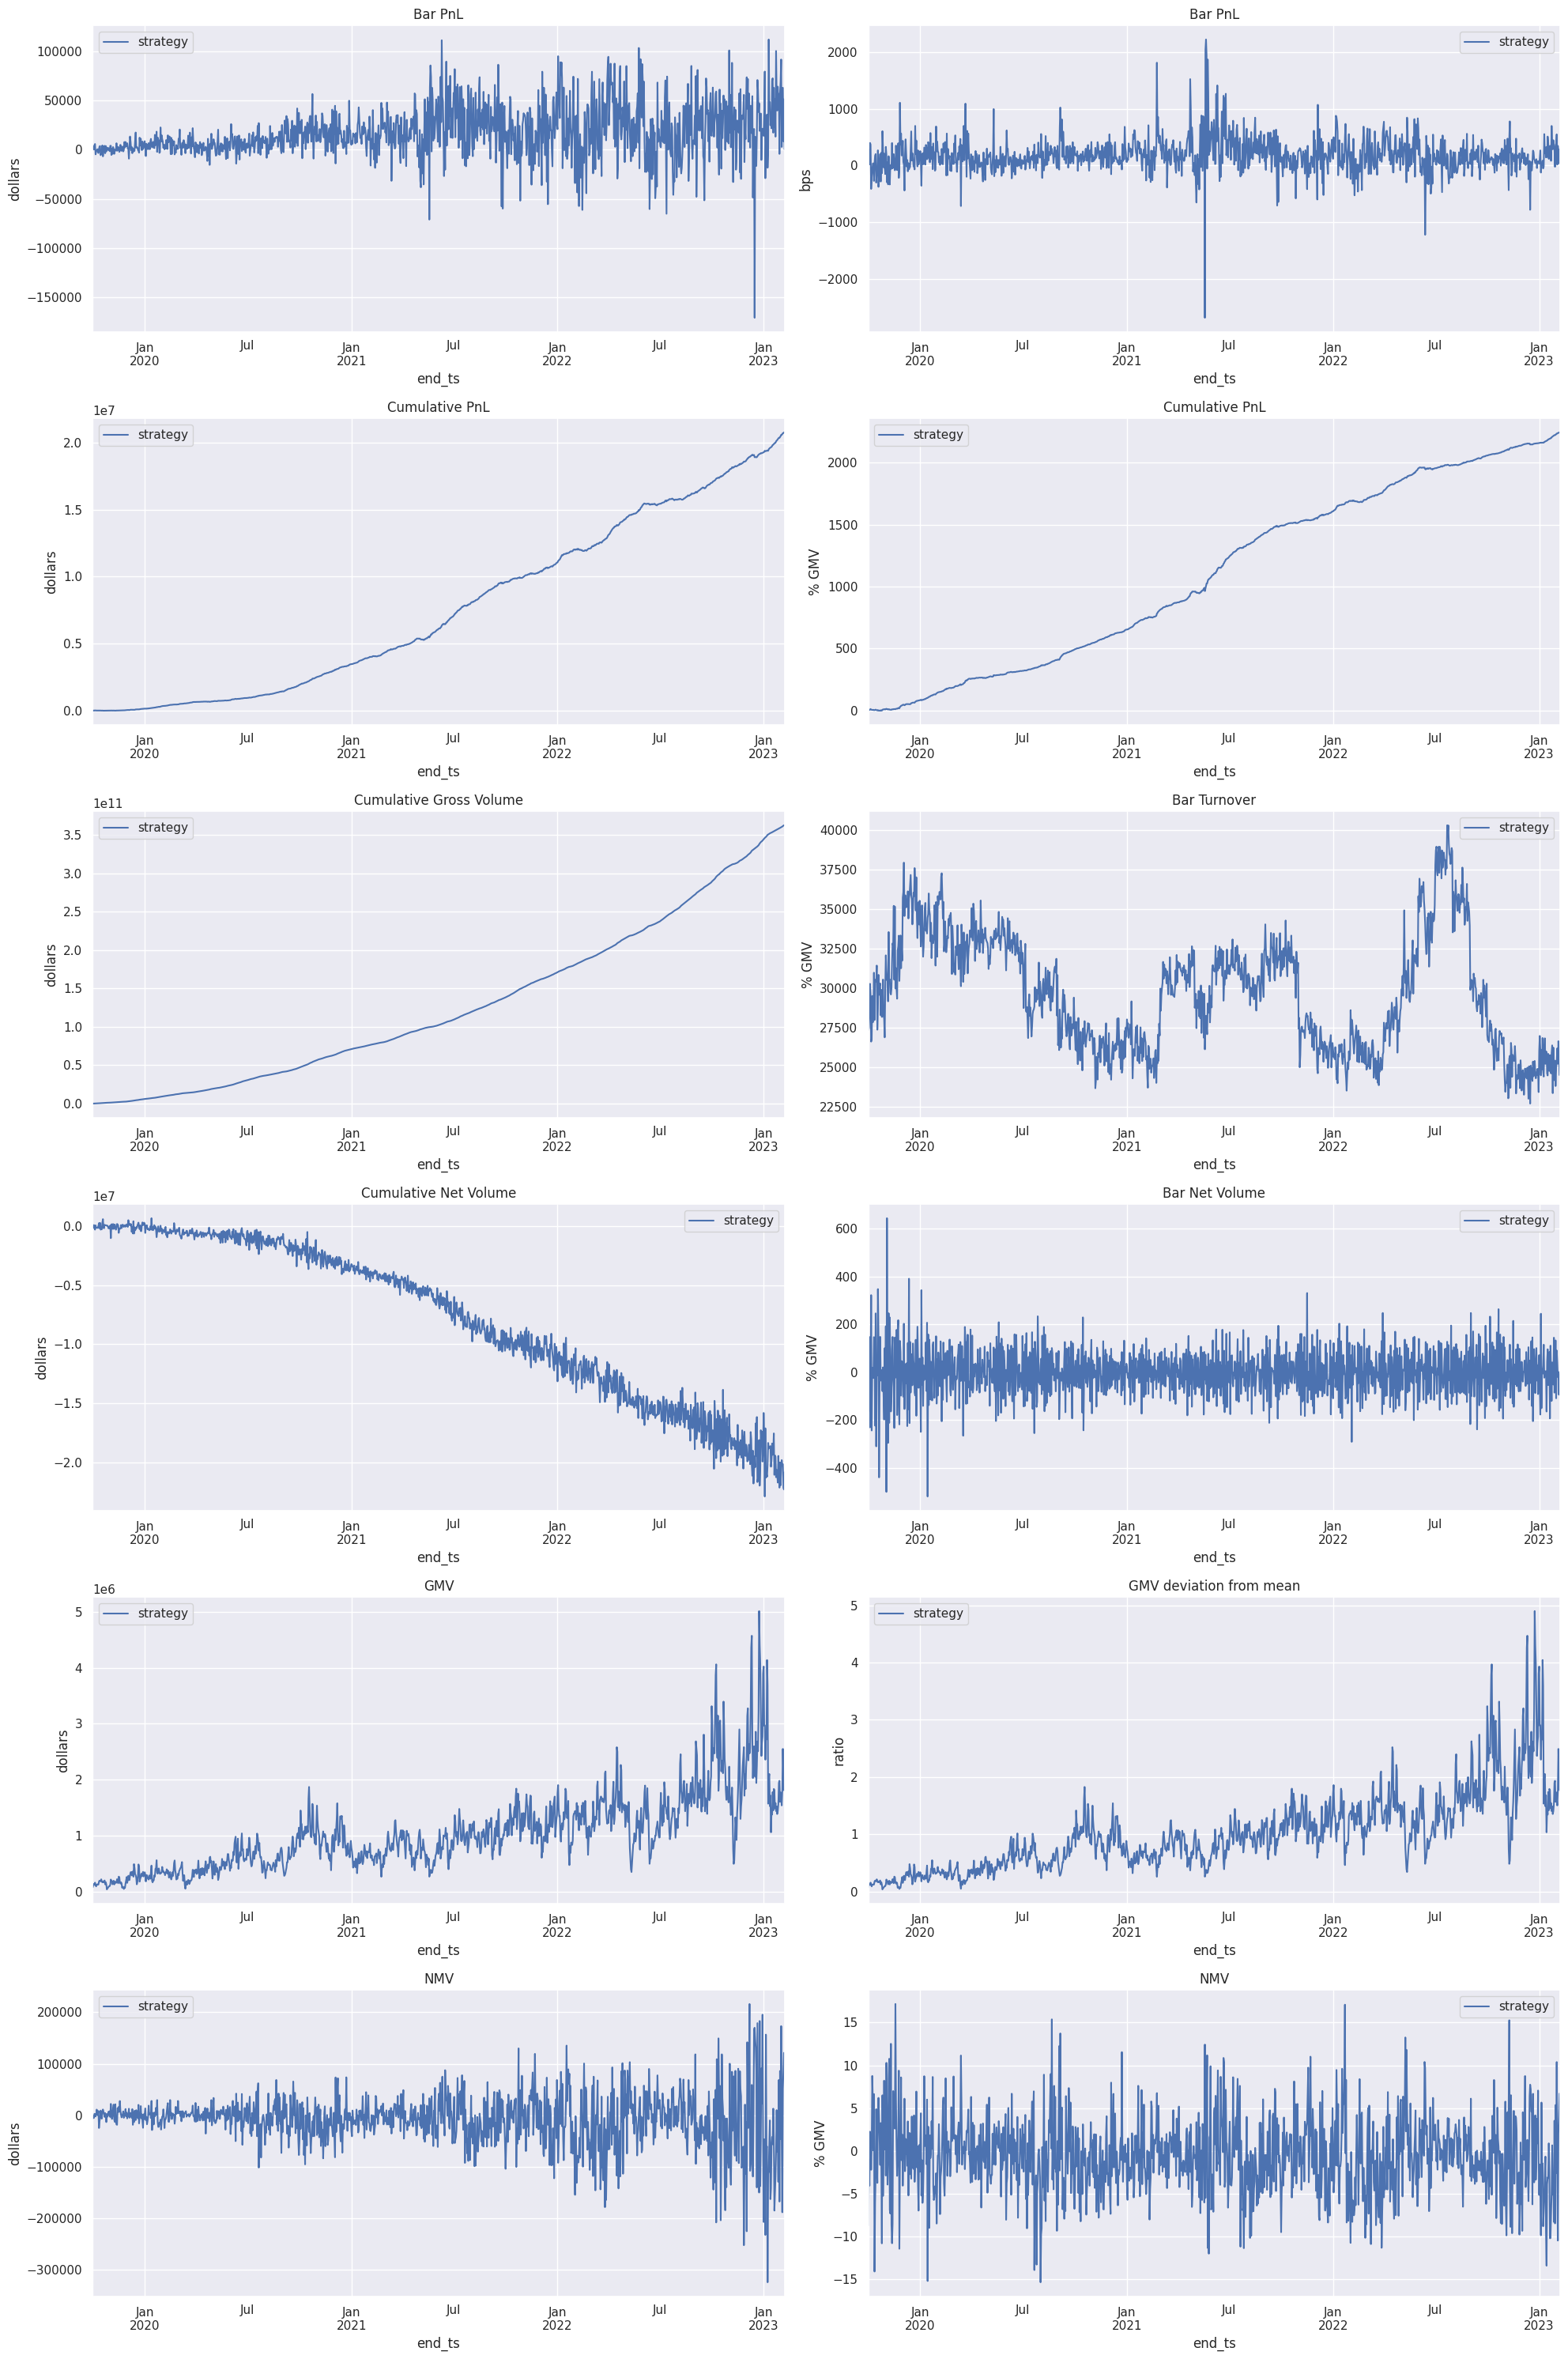

In [8]:
coplotti.plot_portfolio_stats(
    bar_metrics,
    freq=config["plot_portfolio_stats_freq"],
)

# Compute stats

In [9]:
stats_computer = dtfmod.StatsComputer()
#
portfolio_stats, _ = stats_computer.compute_portfolio_stats(
    bar_metrics,
    config["plot_portfolio_stats_freq"],
)
with pd.option_context("display.float_format", "{:,.2f}".format):
    display(portfolio_stats)

ratios      sharpe_ratio                           12.43
            sharpe_ratio_standard_error             0.60
            sr.tval                                22.78
            sr.pval                                 0.00
            kratio                                  2.81
dollar      gmv_mean                        1,023,350.53
            gmv_stdev                         690,811.18
            annualized_mean_return          6,188,614.19
            annualized_volatility             497,804.76
            max_drawdown                      200,796.98
            pnl_mean                           16,943.50
            pnl_std                            26,047.37
            turnover_mean                 295,687,547.47
            turnover_stdev                188,322,078.02
            market_bias_mean                   -8,869.04
            market_bias_stdev                  50,490.44
percentage  annualized_mean_return                604.74
            annualized_volatili

# Plot metrics

In [10]:
metric_modes = ["pnl", "pnl_in_bps", "hit_rate"]

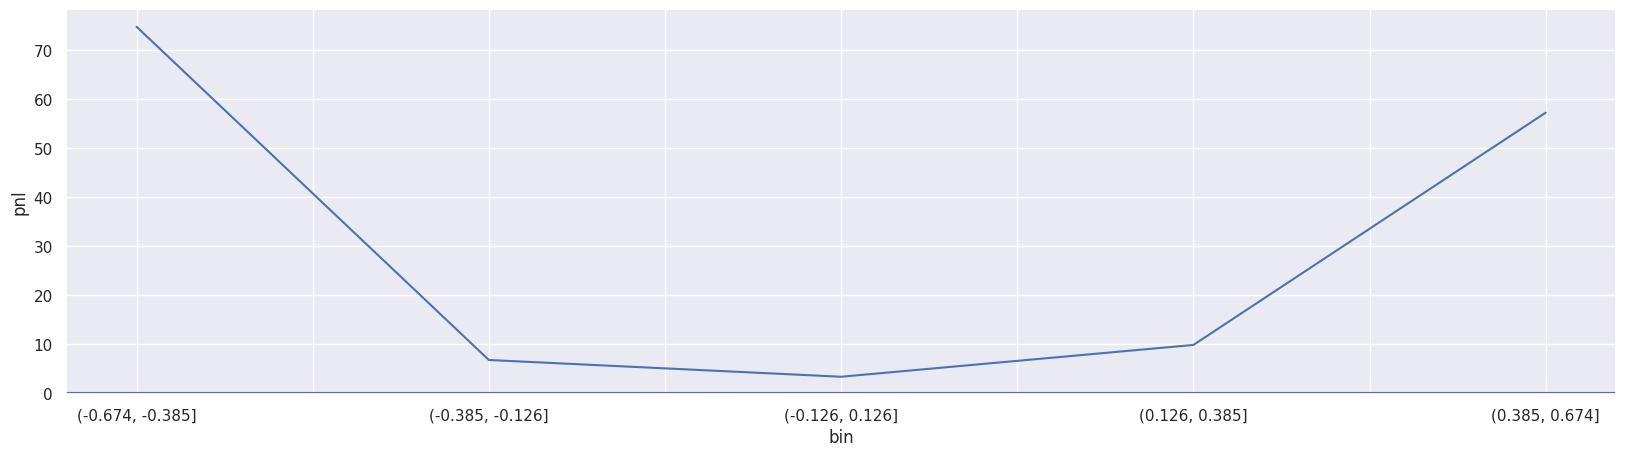

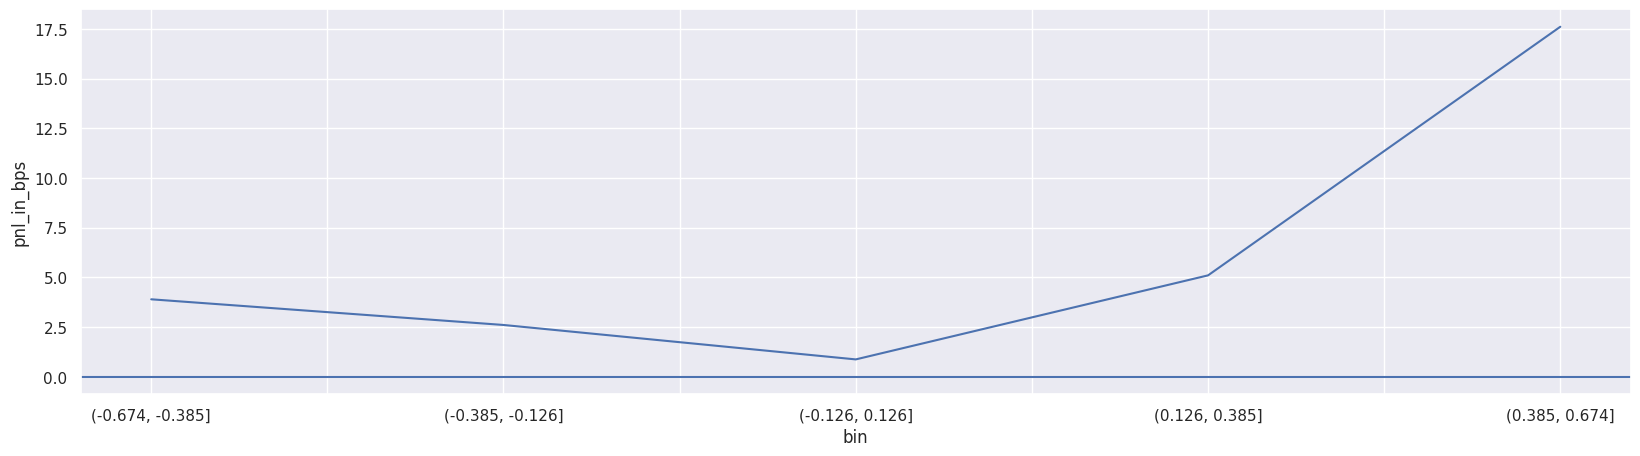

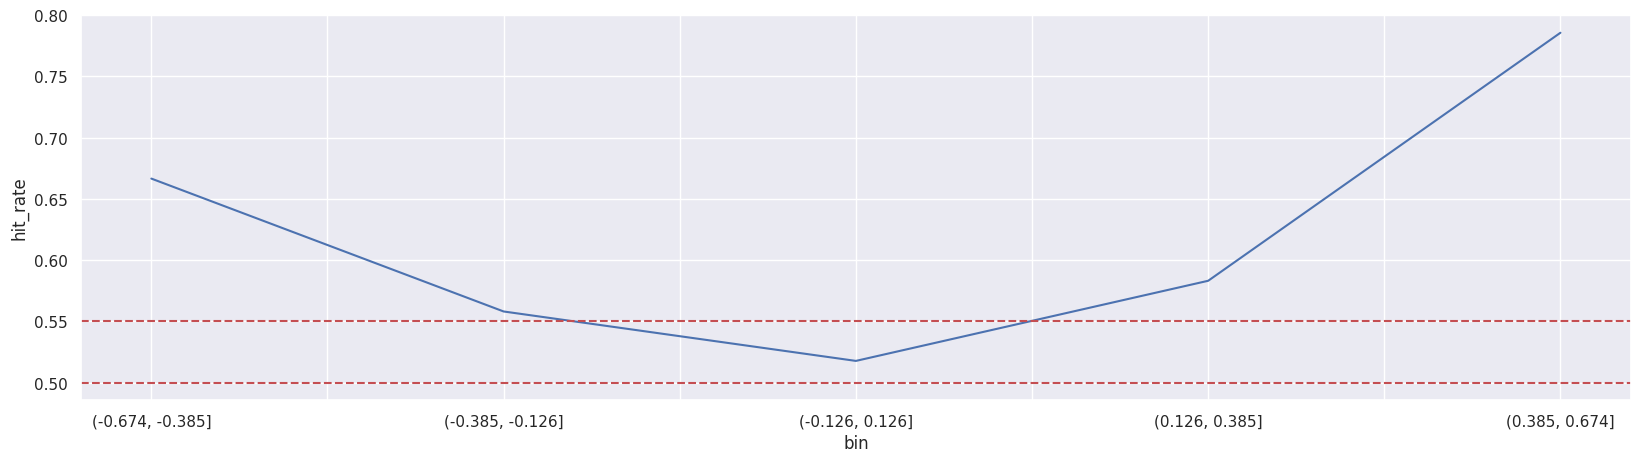

In [11]:
for metric in metric_modes:
    metric_stats = fep.bin_annotated_portfolio_df(
        portfolio_df,
        config["fep_binning_portfolio"]["proportion_of_data_per_bin"],
        metric,
    )["mean"].mean(axis=1)
    _ = metric_stats.plot(
        kind="line",
        ylabel=metric,
        xlabel="bin",
        rot=0,
    )
    if metric == "hit_rate":
        plt.axhline(y=0.5, color="r", linestyle="--")
        plt.axhline(y=0.55, color="r", linestyle="--")
    else:
        plt.axhline(y=0.0, color="b", linestyle="-")
    plt.show()